# Simple Harmonic Oscillations (SKP)

The differential equation to be solved is
$$ y''+\omega^2y=0 $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

In [2]:
T = 2  # time period of oscillations
w = 2*np.pi/T

# Write the differential equation. (x=t,dy/dx=yp)

def dSdx(x,S):
    y, yp = S
    return [yp, -w**2*y] 

def dydx(x,y,yp):
    return yp
def dypdx(x,y,yp):
    return -w**2*y

In [3]:
x_0, y_0, yp_0 = 0, 0, 4  # input - initial conditions
x_min, x_max = x_0, 10   # input - lower and upper limit of x

dx = (x_max-x_0)/1000    # infinitesimal length

## Solution

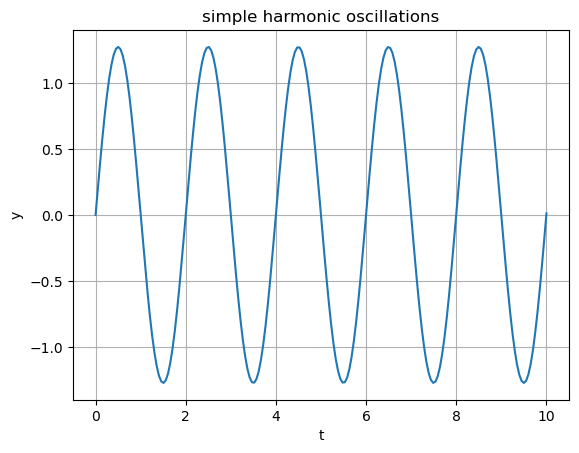

In [4]:
# Using solve_ivp
y0, yp0 = y_0, yp_0
S0 = (y0,yp0)
x = np.linspace(x_min, x_max,200)
sol = solve_ivp(dSdx, t_span=(min(x), max(x)), y0=S0, t_eval=x)
y1 = sol.y[0]
plt.plot(x,y1)
plt.xlabel('t')
plt.ylabel('y')
plt.title('simple harmonic oscillations')
plt.grid()
plt.show()

## Phase - Space

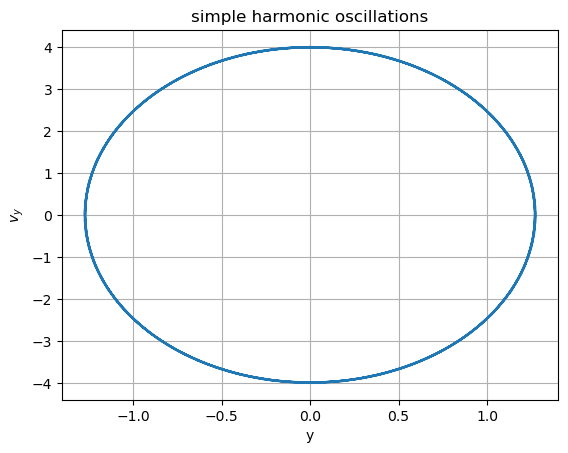

In [5]:
# Using solve_ivp
y0, yp0 = y_0, yp_0
S0 = (y0,yp0)
x = np.linspace(x_min, x_max,200)
sol = solve_ivp(dSdx, t_span=(min(x), max(x)), y0=S0, t_eval=x)
y1 = sol.y[0]
yp1 = sol.y[1]
plt.plot(y1,yp1)
plt.xlabel('y')
plt.ylabel('$v_y$')
plt.title('simple harmonic oscillations')
plt.grid()
plt.show()

## All Methods

`# ALL METHODS`

```python
# Using odeint
y0, yp0 = y_0, yp_0
S0 = (y0,yp0)
x = np.linspace(x_min, x_max,200)
sol = odeint(dSdx, y0=S0, t=x, tfirst=True)
y1 = sol.T[0]
plt.plot(x,y1, '--', label='Using odeint')
```
```python
# Using solve_ivp
y0, yp0 = y_0, yp_0
S0 = (y0,yp0)
x = np.linspace(x_min, x_max,200)
sol = solve_ivp(dSdx, t_span=(min(x), max(x)), y0=S0, t_eval=x)
y1 = sol.y[0]
plt.plot(x,y1, '--', label='Using solve_ivp')
```
```python
# Euler's Method
x, y, yp = x_0, y_0, yp_0
xmax = x_max
h = dx
xx, yy, yyp = [], [], []
while abs(x) < abs(xmax):
    xx.append(x)
    yy.append(y)
    yyp.append(yp)
    x += h
    y += h*dydx(x,y,yp)
    yp += h*dypdx(x,y,yp)
plt.plot(xx,yy, '--', label='Euler\'s Method')
```
```python
# Modified Euler's Method
x, y, yp = x_0, y_0, yp_0
xmax = x_max
h = dx
xx, yy, yyp = [], [], []
while abs(x) < abs(xmax):
    xx.append(x)
    yy.append(y)
    yyp.append(yp)
    x += h
    dy = (h/2)*(dydx(x,y,yp) + dydx(x + h, y + h*dydx(x,y,yp), yp + h*dypdx(x,y,yp)))
    dyp = (h/2)*(dypdx(x,y,yp) + dypdx(x + h, y + h*dydx(x,y,yp), yp + h*dypdx(x,y,yp)))
    y += dy
    yp += dyp
plt.plot(xx,yy, '--', label='Modified Euler\'s Method')
```
```python
# Runge - Kutta Method
x, y, yp = x_0, y_0, yp_0
xmax = x_max
h = dx
xx, yy, yyp = [], [], []
while abs(x) < abs(xmax):
    xx.append(x), yy.append(y), yyp.append(yp)
    x += h
    k1 = h * dydx(x,y,yp)
    l1 = h * dypdx(x,y, yp)
    k2 = h * dydx(x + (h/2), y + (k1/2), yp + (l1/2))
    l2 = h * dypdx(x + (h/2), y + (k1/2), yp + (l1/2))
    k3 = h * dydx(x * (h/2), y + (k2/2), yp + (l2/2))
    l3 = h * dypdx(x + (h/2), y + (k2/2), yp + (l2/2))
    k4 = h * dydx(x + h, y + k3, yp + l3)
    l4 = h * dypdx(x + h, y + k3, yp + l3)
    y += (1/6)*(k1 + 2*(k2 + k3) + k4)
    yp += (1/6)*(l1 + 2*(l2 + l3) + l4)
plt.plot(xx,yy, '--', label='Runge - Kutta Method')

plt.xlabel('t')
plt.ylabel('y')
plt.title('simple harmonic oscillations')
plt.legend()
plt.grid()
plt.show()
```